# Analysis of Video Compression with EcoMotionZip

### Read raw video dataset and record details

In [1]:
import pandas as pd
import os
from moviepy.editor import VideoFileClip

rename_info = pd.read_csv('./Experiments/File_Rename_Info.csv')

def get_processing_time(log_file_path):
    if os.path.exists(log_file_path):
        with open(log_file_path, "r") as log_file:
            lines = log_file.readlines()
            last_line = lines[-1].strip()
            # print(last_line)
            if last_line.endswith("seconds."):
                processing_time = last_line.split()[-2]
            else:
                processing_time = None
    else:
        processing_time = None

    return processing_time
    

In [2]:

def get_video_info(directory):
    video_info = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
                file_path = os.path.join(root, file)
                video = VideoFileClip(file_path)
                duration = video.duration
                fps = video.fps
                resolution = video.size
                file_size = os.path.getsize(file_path)
                frame_count = video.reader.nframes
                video_info.append({
                    "Video_Name": file, 
                    "file_size": file_size,
                    "duration": duration,
                    "frame_count": frame_count,
                    "fps": fps,
                    "resolution": resolution
                    
                })
    return pd.DataFrame(video_info)

directory = "./Experiments/Test_Video_Dataset"
video_data = get_video_info(directory)
video_data['file_size'] = video_data['file_size'] / 1048576
video_data['Original_Video_Name'] = video_data['Video_Name']

for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    video_data.loc[video_data['Video_Name'] == old_video_name, 'Video_Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
video_data.insert(1, 'Dataset', video_data['Video_Name'].str.split('_').str[0])

# Bring the "Original_Video_Name" column to the front of the dataframe
cols = video_data.columns.tolist()
cols = cols[-1:] + cols[:-1]
video_data = video_data[cols]

video_data

,Original_Video_Name,Video_Name,Dataset,file_size,duration,frame_count,fps,resolution
0,cam_7_S_video_20210310_142405.h264.avi,Ratnayake2022_V3,Ratnayake2022,1259.698936,600.13,18004,30.0,"[1920, 1080]"
1,cam_4_N_video_20210317_120802.h264.avi,Ratnayake2022_V10,Ratnayake2022,942.189533,598.37,17952,30.0,"[1920, 1080]"
2,cam_2_S_video_20210308_112402.h264.avi,Ratnayake2022_V6,Ratnayake2022,1236.242653,600.13,18004,30.0,"[1920, 1080]"
3,cam_4_N_video_20210317_114802.h264.avi,Ratnayake2022_V9,Ratnayake2022,977.497154,600.13,18004,30.0,"[1920, 1080]"
4,cam_4_N_video_20210309_132604.h264.avi,Ratnayake2022_V1,Ratnayake2022,1024.718670,600.07,18003,30.0,"[1920, 1080]"
5,cam_3_N_video_20210317_142705.h264.avi,Ratnayake2022_V4,Ratnayake2022,899.098175,598.63,17959,30.0,"[1920, 1080]"
6,cam_8_N_video_20210310_133844.h264.avi,Ratnayake2022_V2,Ratnayake2022,966.772497,600.10,18004,30.0,"[1920, 1080]"
7,cam_1_N_video_20210315_132804.h264.avi,Ratnayake2022_V8,Ratnayake2022,1205.925222,598.90,17968,30.0,"[1920, 1080]"
8,cam_1_S_video_20210317_123004.h264.avi,Ratnayake2022_V5,Ratnayake2022,1258.126583,600.40,18013,30.0,"[1920, 1080]"
9,cam_3_S_video_20210312_123203.h264.avi,Ratnayake2022_V7,Ratnayake2022,1124.785391,600.00,18001,30.0,"[1920, 1080]"


In [3]:

video_data_summary = video_data.groupby(['Dataset']).sum()
video_data_summary = video_data_summary.reset_index()
video_data_summary = video_data_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
video_data_summary['No. Of Videos'] = video_data.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
video_data_summary = video_data_summary.drop(columns=['Video_Name'])

# Rename the columns in the dataframe.
video_data_summary = video_data_summary.rename(columns={
    "file_size": "File Size (MB)",
    "duration": "Duration (s)",
    "frame_count": "Frame Count",
    "fps": "FPS",
    "resolution": "Video Resolution"
})

# Change the video resolution column to [1920, 1080] for all rows.
video_data_summary['Video Resolution'] = video_data_summary['Video Resolution'].apply(lambda x: [1920, 1080])

#Set the  video resolution of PIC dataset to [1296, 972].
# video_data_summary.loc[video_data_summary['Dataset'] == 'PICT', 'Video Resolution'] = [1296, 972]

# Move the No. Of Videos column after the Dataset column.
video_data_summary = video_data_summary[['Dataset', 'No. Of Videos', 'File Size (MB)', 'Duration (s)', 'Frame Count', 'FPS', 'Video Resolution']]

video_data_summary

,Dataset,No. Of Videos,File Size (MB),Duration (s),Frame Count,FPS,Video Resolution
0,Naqvi2022,3,327.48,181.41,5445,90.0,"[1920, 1080]"
1,NestMonitoring,3,1303.21,2266.44,56664,75.0,"[1920, 1080]"
2,PICT,3,73.09,307.34,5471,54.0,"[1920, 1080]"
3,Ratnayake2021,7,442.45,371.08,22269,420.0,"[1920, 1080]"
4,Ratnayake2022,10,10895.05,5996.86,179912,300.0,"[1920, 1080]"
5,vanderVoort2022,1,23.59,32.90,790,24.0,"[1920, 1080]"


### Read RPi5 results and record data

In [4]:
directory = "./Experiments/Test_Replicates/RPi5/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path)
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_RPi5": file,
                "File_Size_(MB)_RPi5": round((file_size+csv_filesize)/1048576,3),
                "Duration_RPi5": duration,
                "Frame_Count_RPi5": frame_count,
                "FPS_RPi5": fps,
                "Proc_Time_RPi5_R1": float(processing_time_1),
                "Proc_Time_RPi5_R2": float(processing_time_2),
                "Proc_Time_RPi5_R3": float(processing_time_3)
            })

RPi5_results = pd.DataFrame(video_info)

RPi5_results['Processing_Time_RPi5'] = round(RPi5_results[['Proc_Time_RPi5_R1', 'Proc_Time_RPi5_R2', 'Proc_Time_RPi5_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
RPi5_results['Processing_Time_RPi5_SD'] = round(RPi5_results[['Proc_Time_RPi5_R1', 'Proc_Time_RPi5_R2', 'Proc_Time_RPi5_R3']].std(axis=1),3)


RPi5_results.head()

,Video_Name_RPi5,File_Size_(MB)_RPi5,Duration_RPi5,Frame_Count_RPi5,FPS_RPi5,Proc_Time_RPi5_R1,Proc_Time_RPi5_R2,Proc_Time_RPi5_R3,Processing_Time_RPi5,Processing_Time_RPi5_SD
0,08040046.avi,40.288,59.53,1786,30.0,124.97,124.54,124.97,124.83,0.248
1,bee_test_1.mp4,3.606,13.58,815,60.0,67.23,69.24,64.74,67.07,2.254
2,mee313618-sup-0002-videos1.mp4,3.935,69.40,1042,15.0,42.63,42.15,42.66,42.48,0.286
3,cam_2_S_video_20210308_112402.h264.avi,5.610,16.07,483,30.0,187.27,198.77,184.26,190.10,7.658
4,bee_test_6.mp4,8.425,32.68,1961,60.0,116.35,116.90,115.88,116.38,0.511


### Read RPi5 results and record data

In [5]:
directory = "./Experiments/Test_Replicates/RPi4/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_RPi4": file,
                "File_Size_(MB)_RPi4": file_size+csv_filesize,
                "Duration_RPi4": duration,
                "Frame_Count_RPi4": frame_count,
                "FPS_RPi4": fps,
                "Proc_Time_RPi4_R1": float(processing_time_1),
                "Proc_Time_RPi4_R2": float(processing_time_2),
                "Proc_Time_RPi4_R3": float(processing_time_3)
            })

RPi4_results = pd.DataFrame(video_info)

RPi4_results['Processing_Time_RPi4'] = round(RPi4_results[['Proc_Time_RPi4_R1', 'Proc_Time_RPi4_R2', 'Proc_Time_RPi4_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
RPi4_results['Processing_Time_RPi4_SD'] = round(RPi4_results[['Proc_Time_RPi4_R1', 'Proc_Time_RPi4_R2', 'Proc_Time_RPi4_R3']].std(axis=1),3)

RPi4_results.head()

,Video_Name_RPi4,File_Size_(MB)_RPi4,Duration_RPi4,Frame_Count_RPi4,FPS_RPi4,Proc_Time_RPi4_R1,Proc_Time_RPi4_R2,Proc_Time_RPi4_R3,Processing_Time_RPi4,Processing_Time_RPi4_SD
0,08040046.avi,40.196471,59.33,1780,30.0,234.70,242.20,244.10,240.33,4.970
1,bee_test_1.avi,3.568596,13.38,803,60.0,107.79,107.25,107.79,107.61,0.312
2,mee313618-sup-0002-videos1.avi,3.958268,69.07,1037,15.0,65.44,65.16,65.17,65.26,0.159
3,cam_2_S_video_20210308_112402.h264.avi,5.523088,15.83,475,30.0,278.31,288.30,285.73,284.11,5.188
4,bee_test_6.avi,8.447001,32.43,1946,60.0,186.95,188.89,186.36,187.40,1.324


### Read JetsonNano results and record data

In [6]:
directory = "./Experiments/Test_Replicates/JetsonNano/Rep1"

video_info = []
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith(".mp4") or file.endswith(".avi") or file.endswith(".mkv"):
            file_path = os.path.join(root, file)
            # print(file_path)
            video = VideoFileClip(file_path)
            # print(file_path)
            duration = video.duration
            fps = video.fps
            file_size = os.path.getsize(file_path) / 1048576  # Convert to MB
            frame_count = video.reader.nframes
            log_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_output.log") 
            csv_file_path = os.path.join(root, f"{os.path.splitext(file)[0]}_video_info.csv")
            csv_filesize =  os.path.getsize(csv_file_path)/1048576
            processing_time_1= get_processing_time(log_file_path)
            processing_time_2 = get_processing_time(log_file_path.replace("Rep1", "Rep2"))
            processing_time_3 = get_processing_time(log_file_path.replace("Rep1", "Rep3") )
            # print(file, file_size, duration, fps, processing_time)
            video_info.append({
                "Video_Name_JetsonNano": file,
                "File_Size_(MB)_JetsonNano": file_size+csv_filesize,
                "Duration_JetsonNano": duration,
                "Frame_Count_JetsonNano": frame_count,
                "FPS_JetsonNano": fps,
                "Proc_Time_JetsonNano_R1": float(processing_time_1),
                "Proc_Time_JetsonNano_R2": float(processing_time_2),
                "Proc_Time_JetsonNano_R3": float(processing_time_3)
            })

JetsonNano_results = pd.DataFrame(video_info)

JetsonNano_results['Processing_Time_JetsonNano'] = round(JetsonNano_results[['Proc_Time_JetsonNano_R1', 'Proc_Time_JetsonNano_R2', 'Proc_Time_JetsonNano_R3']].mean(axis=1),2)

# Calculate the standard deviation of the processing time for each video.
JetsonNano_results['Processing_Time_JetsonNano_SD'] = round(JetsonNano_results[['Proc_Time_JetsonNano_R1', 'Proc_Time_JetsonNano_R2', 'Proc_Time_JetsonNano_R3']].std(axis=1),3)

JetsonNano_results.head()

,Video_Name_JetsonNano,File_Size_(MB)_JetsonNano,Duration_JetsonNano,Frame_Count_JetsonNano,FPS_JetsonNano,Proc_Time_JetsonNano_R1,Proc_Time_JetsonNano_R2,Proc_Time_JetsonNano_R3,Processing_Time_JetsonNano,Processing_Time_JetsonNano_SD
0,08040046.avi,181.477080,59.33,1780,30.0,174.10,149.21,147.19,156.83,14.987
1,bee_test_1.avi,17.231031,13.38,803,60.0,64.88,64.81,64.81,64.83,0.040
2,mee313618-sup-0002-videos1.avi,12.727021,69.07,1037,15.0,36.11,35.63,36.13,35.96,0.283
3,cam_2_S_video_20210308_112402.h264.avi,5.522078,15.83,475,30.0,235.39,236.52,233.95,235.29,1.288
4,bee_test_6.avi,47.275686,32.43,1946,60.0,109.37,109.84,109.85,109.69,0.274


### Combine results and analyse

In [7]:
# Merge the three dataframes based on the video name. Ignore the extension in the video name. Sort the dataframe by the video name.
results = pd.merge(video_data, RPi5_results, left_on=video_data['Original_Video_Name'].str.split('.').str[0], right_on=RPi5_results['Video_Name_RPi5'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])
results = pd.merge(results, RPi4_results, left_on=results['Original_Video_Name'].str.split('.').str[0], right_on=RPi4_results['Video_Name_RPi4'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])

results = pd.merge(results, JetsonNano_results, left_on=video_data['Original_Video_Name'].str.split('.').str[0], right_on=JetsonNano_results['Video_Name_JetsonNano'].str.split('.').str[0], how="inner")
results = results.drop(columns=['key_0'])

results = results.sort_values(by="Video_Name")

results.head()

,Original_Video_Name,Video_Name,Dataset,file_size,duration,frame_count,fps,resolution,Video_Name_RPi5,File_Size_(MB)_RPi5,...,Video_Name_JetsonNano,File_Size_(MB)_JetsonNano,Duration_JetsonNano,Frame_Count_JetsonNano,FPS_JetsonNano,Proc_Time_JetsonNano_R1,Proc_Time_JetsonNano_R2,Proc_Time_JetsonNano_R3,Processing_Time_JetsonNano,Processing_Time_JetsonNano_SD
24,08140020.avi,Naqvi2022_V1,Naqvi2022,109.171209,60.47,1815,30.0,"[1920, 1080]",08140020.avi,3.077,...,08140020.avi,12.767562,22.37,672,30.0,48.63,49.08,49.53,49.08,0.450
25,08040046.avi,Naqvi2022_V2,Naqvi2022,109.142805,60.47,1815,30.0,"[1920, 1080]",08040046.avi,40.288,...,08040046.avi,181.477080,59.33,1780,30.0,174.10,149.21,147.19,156.83,14.987
26,08210024.avi,Naqvi2022_V3,Naqvi2022,109.168022,60.47,1815,30.0,"[1920, 1080]",08210024.avi,27.246,...,08210024.avi,127.224993,56.47,1695,30.0,108.91,108.62,114.07,110.53,3.066
10,00026.avi,NestMonitoring_V1,NestMonitoring,495.194162,755.48,18888,25.0,"[1920, 1080]",00026.avi,18.796,...,00026.avi,77.130566,184.92,4624,25.0,366.39,376.28,376.98,373.22,5.922
11,00024.avi,NestMonitoring_V2,NestMonitoring,447.693756,755.48,18888,25.0,"[1920, 1080]",00024.avi,26.815,...,00024.avi,115.323465,318.36,7960,25.0,474.93,471.01,472.51,472.82,1.978


### Analyse of Video Compression Results

In [8]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the file size, the duration, the frame count, File size RPi5, Duration_RPi5 and number of frames RPi5 .
compression = results[['Video_Name', 'file_size', 'duration', 'frame_count', 'File_Size_(MB)_RPi5', 'Duration_RPi5', 'Frame_Count_RPi5']]

# Rename the columns to make them more readable.
compression.columns = ['Video_Name', 'Raw File Size (MB)', 'Raw Duration (s)', 'Raw Frame Count', 'Processed File Size (MB)', 'Processed Duration (s)', 'Processed Frame Count']

# Calculate the percentage reduction in File Size and Frame Count.
compression['File Size Reduction (%)'] = ((compression['Raw File Size (MB)'] - compression['Processed File Size (MB)']) / compression['Raw File Size (MB)']) * 100
compression['Frame Count Reduction (%)'] = ((compression['Raw Frame Count'] - compression['Processed Frame Count']) / compression['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
results_display = compression.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    compression.loc[compression['Video_Name'] == old_video_name, 'Video_Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
compression.insert(1, 'Dataset', compression['Video_Name'].str.split('_').str[0])

# Display the dataframe.
compression.head()


,Video_Name,Dataset,Raw File Size (MB),Raw Duration (s),Raw Frame Count,Processed File Size (MB),Processed Duration (s),Processed Frame Count,File Size Reduction (%),Frame Count Reduction (%)
24,Naqvi2022_V1,Naqvi2022,109.171209,60.47,1815,3.077,22.60,679,97.181491,62.589532
25,Naqvi2022_V2,Naqvi2022,109.142805,60.47,1815,40.288,59.53,1786,63.086893,1.597796
26,Naqvi2022_V3,Naqvi2022,109.168022,60.47,1815,27.246,56.67,1701,75.042142,6.280992
10,NestMonitoring_V1,NestMonitoring,495.194162,755.48,18888,18.796,187.12,4679,96.204317,75.227658
11,NestMonitoring_V2,NestMonitoring,447.693756,755.48,18888,26.815,320.72,8019,94.010415,57.544473


### Summarise of Video Compression Results

In [9]:
# Create a new dataframe name named "compression_summary" from the "compression" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw file size, processed file size, raw duration, processed duration, raw frame count and processed frame count.
compression_summary = compression.groupby(['Dataset']).sum()
compression_summary = compression_summary.reset_index()
compression_summary = compression_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
compression_summary['No. Of Videos'] = compression.groupby(['Dataset']).size().values

# Drop the  Video Name column from the dataframe.
compression_summary = compression_summary.drop(columns=['Video_Name'])

# Recalculate the percentage reduction in File Size and Frame Count.
compression_summary['File Size Reduction (%)'] = ((compression_summary['Raw File Size (MB)'] - compression_summary['Processed File Size (MB)']) / compression_summary['Raw File Size (MB)']) * 100
compression_summary['Frame Count Reduction (%)'] = ((compression_summary['Raw Frame Count'] - compression_summary['Processed Frame Count']) / compression_summary['Raw Frame Count']) * 100

# Round the values in the dataframe to 2 decimal places.
compression_summary = compression_summary.round(2)

# Move the No. Of Videos column after the Dataset column.
compression_summary = compression_summary[['Dataset', 'No. Of Videos', 'Raw Frame Count', 'Raw File Size (MB)', 'Processed Frame Count', 'Processed File Size (MB)', 'Frame Count Reduction (%)', 'File Size Reduction (%)', 
                                           'Raw Duration (s)', 'Processed Duration (s)']]

compression_summary

,Dataset,No. Of Videos,Raw Frame Count,Raw File Size (MB),Processed Frame Count,Processed File Size (MB),Frame Count Reduction (%),File Size Reduction (%),Raw Duration (s),Processed Duration (s)
0,Naqvi2022,3,5445,327.48,4166,70.61,23.49,78.44,181.41,138.80
1,NestMonitoring,3,56664,1303.21,14331,52.92,74.71,95.94,2266.44,573.12
2,PICT,3,5471,73.09,3862,20.80,29.41,71.54,307.34,216.23
3,Ratnayake2021,7,22269,442.45,9989,39.48,55.14,91.08,371.08,166.41
4,Ratnayake2022,10,179912,10895.05,12423,266.02,93.09,97.56,5996.86,413.92
5,vanderVoort2022,1,790,23.59,775,2.47,1.90,89.53,32.90,32.25


In [10]:
# Calaculate the average Frame Size Reduction % and File Size Reduction % and print it.
print(f"Average Frame Size Reduction %: {round(compression_summary['Frame Count Reduction (%)'].mean(),2)}")
print(f"Average File Size Reduction %: {round(compression_summary['File Size Reduction (%)'].mean(),2)}")

Average Frame Size Reduction %: 46.29
Average File Size Reduction %: 87.35


### Analyse Processing Times on Platforms

In [11]:
# Create a new dataframe from the results dataframe with only the columns we want to display. These columns are the video name, the duration, fps, frame count Processing_Time_RPi5 and Processing_Time_RPi4 .
processing_time = results[['Video_Name', 'duration', 'fps', 'frame_count', 'Processing_Time_RPi5', 'Processing_Time_RPi5_SD', 'Processing_Time_RPi4', 'Processing_Time_RPi4_SD', 'Processing_Time_JetsonNano', 'Processing_Time_JetsonNano_SD']]
processing_time.columns = ['Video_Name', 'Raw Video Duration (s)', 'FPS', 'Raw Video Frame Count', 'Processing Time RPi5 (s)', 'Processing Time RPi5 -SD (s)', 'Processing Time RPi4 (s)','Processing Time RPi4 -SD (s)',
                            'Processing Time JetsonNano (s)','Processing Time JetsonNano -SD (s)']

# Convert the Processing_Time_RPi5 and Processing_Time_RPi4 columns to float.
processing_time['Processing Time RPi5 (s)'] = processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Time RPi4 (s)'] = processing_time['Processing Time RPi4 (s)'].astype(float)
processing_time['Processing Time RPi5 -SD (s)'] = processing_time['Processing Time RPi5 -SD (s)'].astype(float)
processing_time['Processing Time RPi4 -SD (s)'] = processing_time['Processing Time RPi4 -SD (s)'].astype(float)
processing_time['Processing Time JetsonNano (s)'] = processing_time['Processing Time JetsonNano (s)'].astype(float)
processing_time['Processing Time JetsonNano -SD (s)'] = processing_time['Processing Time JetsonNano -SD (s)'].astype(float)


# Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time['Processing Speed RPi5 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi5 (s)'].astype(float)
processing_time['Processing Speed RPi4 (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time RPi4 (s)'].astype(float)
processing_time['Processing Speed JetsonNano (fps)'] = processing_time['Raw Video Frame Count'].astype(float) / processing_time['Processing Time JetsonNano (s)'].astype(float)

# Round the values in the dataframe to 2 decimal places.
processing_time = processing_time.round(2)

# Rename the video names to the names in the rename_info dataframe.
# Rename the videos in df_merged
for index, row in rename_info.iterrows():
    old_video_name = row['Old_Video_Name']
    new_video_name = row['New_Video_Name']
    processing_time.loc[processing_time['Video_Name'] == old_video_name, 'Video_Name'] = new_video_name

# Insert a new column next to the video name column with the video name before the "_". Rename the column to "Dataset".
processing_time.insert(1, 'Dataset', processing_time['Video_Name'].str.split('_').str[0])

processing_time.head()



,Video_Name,Dataset,Raw Video Duration (s),FPS,Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi5 -SD (s),Processing Time RPi4 (s),Processing Time RPi4 -SD (s),Processing Time JetsonNano (s),Processing Time JetsonNano -SD (s),Processing Speed RPi5 (fps),Processing Speed RPi4 (fps),Processing Speed JetsonNano (fps)
24,Naqvi2022_V1,Naqvi2022,60.47,30.0,1815,48.17,0.35,76.46,1.01,49.08,0.45,37.68,23.74,36.98
25,Naqvi2022_V2,Naqvi2022,60.47,30.0,1815,124.83,0.25,240.33,4.97,156.83,14.99,14.54,7.55,11.57
26,Naqvi2022_V3,Naqvi2022,60.47,30.0,1815,99.08,0.79,176.95,0.26,110.53,3.07,18.32,10.26,16.42
10,NestMonitoring_V1,NestMonitoring,755.48,25.0,18888,388.26,2.52,607.41,6.29,373.22,5.92,48.65,31.10,50.61
11,NestMonitoring_V2,NestMonitoring,755.48,25.0,18888,443.70,17.34,751.68,4.87,472.82,1.98,42.57,25.13,39.95


### Summarise Processing Time Results

In [12]:
# Create a new dataframe name named "processing_time_summary" from the "processing_time" dataframe. This dataframe will group the videos by dataset and calculate the total for the 
# raw video duration, Raw Video Frame Count, processing time RPi5 and processing time RPi4. Average FPS, Processing Speed RPi5 (fps) and Processing Speed RPi4 (fps) will be calculated.

processing_time_summary = processing_time.groupby(['Dataset']).sum()
processing_time_summary = processing_time_summary.reset_index()
processing_time_summary = processing_time_summary.round(2)

# Add a new column "No. Of Videos" to the dataframe. This column will contain the number of videos in each dataset.
processing_time_summary['No. Of Videos'] = processing_time.groupby(['Dataset']).size().values

# Calculate the FPS by averaging total FPS by the number of videos in each dataset.
processing_time_summary['Average FPS'] = processing_time_summary['FPS'] / processing_time_summary['No. Of Videos']
# processing_time_summary['FPS'] = processing_time.groupby(['Dataset']).size().values

# Calculate the mean of Processing Time RPi4 -SD (s) for each dataset and insert it into the dataframe.
processing_time_summary['Processing Time RPi4 - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time RPi4 -SD (s)'].mean().values
processing_time_summary['Processing Time RPi5 - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time RPi5 -SD (s)'].mean().values
processing_time_summary['Processing Time JetsonNano - SD (s)'] = processing_time.groupby(['Dataset'])['Processing Time JetsonNano -SD (s)'].mean().values


# Drop the  Video Name column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['Video_Name'])

# # Calculate the processing speed for RPi5 and RPi4 in frames per second.
processing_time_summary['Avg. Processing Speed RPi5 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi5 (s)'].astype(float)
processing_time_summary['Avg. Processing Speed RPi4 (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time RPi4 (s)'].astype(float)
processing_time_summary['Avg. Processing Speed JetsonNano (fps)'] = processing_time_summary['Raw Video Frame Count'].astype(float) / processing_time_summary['Processing Time JetsonNano (s)'].astype(float)

# # Round the values in the dataframe to 2 decimal places.
processing_time_summary = processing_time_summary.round(2)

# Remove the FPS column from the dataframe. Move the No. Of Videos column and Average FPS column after the Dataset column.
processing_time_summary = processing_time_summary[['Dataset', 'No. Of Videos', 'Average FPS', 'Raw Video Duration (s)', 'Raw Video Frame Count', 'Processing Time RPi5 (s)','Processing Time RPi5 - SD (s)', 'Avg. Processing Speed RPi5 (fps)', 
                                                   'Processing Time RPi4 (s)', 'Processing Time RPi4 - SD (s)' ,'Avg. Processing Speed RPi4 (fps)', 'Processing Time JetsonNano (s)', 'Processing Time JetsonNano - SD (s)' ,'Avg. Processing Speed JetsonNano (fps)']]

# Modify the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns to include the standard deviation.
processing_time_summary['Processing Time RPi5 (s) - SD'] = processing_time_summary['Processing Time RPi5 (s)'].astype(str) + " ± " + processing_time_summary['Processing Time RPi5 - SD (s)'].astype(str)
processing_time_summary['Processing Time RPi4 (s) - SD'] = processing_time_summary['Processing Time RPi4 (s)'].astype(str) + " ± " + processing_time_summary['Processing Time RPi4 - SD (s)'].astype(str)
processing_time_summary['Processing Time JetsonNano (s) - SD'] = processing_time_summary['Processing Time JetsonNano (s)'].astype(str) + " ± " + processing_time_summary['Processing Time JetsonNano - SD (s)'].astype(str)

# Create a new dataframe processing_time_summary_display from the processing_time_summary dataframe. This dataframe will contain only the columns we want to display.
processing_time_summary_display = processing_time_summary[['Dataset', 'No. Of Videos', 'Average FPS', 'Raw Video Duration (s)', 'Raw Video Frame Count', 'Processing Time RPi5 (s) - SD', 
                                                   'Processing Time RPi4 (s) - SD', 'Processing Time JetsonNano (s) - SD', 'Avg. Processing Speed RPi5 (fps)', 'Avg. Processing Speed RPi4 (fps)', 'Avg. Processing Speed JetsonNano (fps)']]

# Rename the columns in the dataframe.
processing_time_summary_display = processing_time_summary_display.rename(columns={
    "Raw Video Duration (s)": "Raw Video Duration (s)",
    "Raw Video Frame Count": "Raw Video Frame Count",
    "Processing Time RPi5 (s) - SD": "Processing Time RPi5 (s) ± SD",
    "Processing Time RPi4 (s) - SD": "Processing Time RPi4 (s) ± SD",
    "Processing Time JetsonNano (s) - SD": "Processing Time JetsonNano (s) ± SD",
    "Avg. Processing Speed RPi5 (fps)": "Avg. Processing Speed RPi5 (fps)",
    "Avg. Processing Speed RPi4 (fps)": "Avg. Processing Speed RPi4 (fps)",
    "Avg. Processing Speed JetsonNano (fps)": "Avg. Processing Speed JetsonNano (fps)"
})

processing_time_summary_display


,Dataset,No. Of Videos,Average FPS,Raw Video Duration (s),Raw Video Frame Count,Processing Time RPi5 (s) ± SD,Processing Time RPi4 (s) ± SD,Processing Time JetsonNano (s) ± SD,Avg. Processing Speed RPi5 (fps),Avg. Processing Speed RPi4 (fps),Avg. Processing Speed JetsonNano (fps)
0,Naqvi2022,3,30.0,181.41,5445,272.08 ± 0.46,493.74 ± 2.08,316.44 ± 6.17,20.01,11.03,17.21
1,NestMonitoring,3,25.0,2266.44,56664,1131.18 ± 6.91,1836.98 ± 5.1,1169.58 ± 3.02,50.09,30.85,48.45
2,PICT,3,18.0,307.34,5471,170.56 ± 0.53,276.99 ± 0.68,147.59 ± 0.36,32.08,19.75,37.07
3,Ratnayake2021,7,60.0,371.08,22269,596.12 ± 0.67,938.42 ± 1.2,564.34 ± 0.86,37.36,23.73,39.46
4,Ratnayake2022,10,30.0,5996.86,179912,2032.5 ± 6.13,2956.55 ± 6.95,2446.6 ± 1.73,88.52,60.85,73.54
5,vanderVoort2022,1,24.0,32.90,790,35.46 ± 0.29,57.72 ± 0.02,41.66 ± 0.01,22.28,13.69,18.96


<Figure size 1000x600 with 0 Axes>

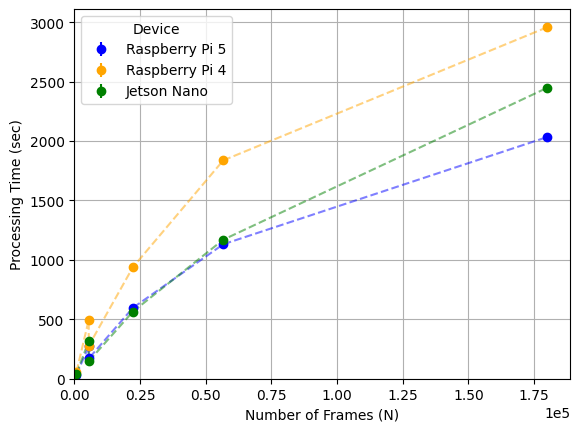

In [13]:
# Plot an errorbar for the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns for each dataset with the standard deviation as the error and Raw Frame Count as the x-axis.
import matplotlib.pyplot as plt
import numpy as np

processing_time_summary_sorted = processing_time_summary.sort_values(by='Raw Video Frame Count', ascending=True)

# Set the seaborn style to vo_8_colorblind
plt.style.use('seaborn-v0_8-colorblind') 
plt.figure(figsize=(10, 6))

# Set the x-axis to be the Raw Frame Count column.
x = processing_time_summary_sorted['Raw Video Frame Count']

# Set the y-axis to be the Processing Times.
y_rpi5 = processing_time_summary_sorted['Processing Time RPi5 (s)']
y_rpi4 = processing_time_summary_sorted['Processing Time RPi4 (s)']
y_jetsonnano = processing_time_summary_sorted['Processing Time JetsonNano (s)']

# Set the error to be the standard dev.
error_rpi5 = processing_time_summary_sorted['Processing Time RPi5 - SD (s)']
error_rpi4 = processing_time_summary_sorted['Processing Time RPi4 - SD (s)']
error_jetsonnano = processing_time_summary_sorted['Processing Time JetsonNano - SD (s)']

# Create a figure and axis.
fig, ax = plt.subplots()

# Plot the RPi5 Data
ax.errorbar(x, y_rpi5, yerr=error_rpi5, fmt='o', label="RPi5", color='blue')
ax.plot(x, y_rpi5, linestyle='--', alpha=0.5, color='blue')

# Plot the RPi4 Data
ax.errorbar(x, y_rpi4, yerr=error_rpi4, fmt='o', label="RPi4", color='orange')
ax.plot(x, y_rpi4, linestyle='--', alpha=0.5, color='orange')

# Plot the JetsonNano Data
ax.errorbar(x, y_jetsonnano, yerr=error_jetsonnano, fmt='o', label="JetsonNano", color='green')
ax.plot(x, y_jetsonnano, linestyle='--', alpha=0.5, color='green')


# Set the axis labels.
plt.xlabel("Number of Frames (N)")
plt.ylabel("Processing Time (sec)")

# Insert Gridlines.
plt.grid()

# Set the legend. and edit labels to Raspberrry Pi 5 and Raspberry Pi 4.
plt.legend(loc="upper left", title="Device")
plt.gca().get_legend().get_texts()[0].set_text('Raspberry Pi 5')
plt.gca().get_legend().get_texts()[1].set_text('Raspberry Pi 4')
plt.gca().get_legend().get_texts()[2].set_text('Jetson Nano')

# Stary the y-axis and x axis from 0.
plt.ylim(0)
plt.xlim(0)

# Chamge the x axis labels to scientific notation.
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xticks(np.arange(0, max(x)+1, 1000))

# Save the plot as a png file.
plt.savefig("./Experiments/Figures/processing_time.png", dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()


# Analysis of Energy Consumption

In [14]:
# Import energy consumption data from the csv files in the Energy_Tests folder. The csv files are named after the video dataset  they were recorded with. csv file has 4 columns: Time, Rep1, Rep2, Rep3. Each column contains the energy consumption data for each repetition of the video dataset.

energy_data = pd.DataFrame()
for root, dirs, files in os.walk("./Experiments/EnergyTests/Combined_Data"):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            # Import the csv file to a new dataframe
            energy_data_temp = pd.read_csv(file_path)

            # Remove the column with the time data
            energy_data_temp = energy_data_temp.drop(columns=['Time'])

            # Rename the columns to the name of the video dataset_Rep1, video dataset_Rep2, video dataset_Rep3
            energy_data_temp = energy_data_temp.rename(columns=lambda x: file.split('.')[0] + '_' + x)

            # Add the data to the energy_data dataframe
            energy_data = pd.concat([energy_data, energy_data_temp], axis=1)

energy_data.head()

,RPi4_vanderVoort2022_Rep1,RPi4_vanderVoort2022_Rep2,RPi4_vanderVoort2022_Rep3,RPi5_vanderVoort2022_Rep1,RPi5_vanderVoort2022_Rep2,RPi5_vanderVoort2022_Rep3,RPi4_Naqvi2022_Rep1,RPi4_Naqvi2022_Rep2,RPi4_Naqvi2022_Rep3,RPi5_JamesCook_Rep1,...,RPi5_PICT_Rep3,RPi4_PICT_Rep1,RPi4_PICT_Rep2,RPi4_PICT_Rep3,RPi5_Naqvi2022_Rep1,RPi5_Naqvi2022_Rep2,RPi5_Naqvi2022_Rep3,JN_vanderVoort2022_Rep1,JN_vanderVoort2022_Rep2,JN_vanderVoort2022_Rep3
0,1.232482,1.037307,1.178064,2.204173,2.204173,2.204173,1.107257,1.235198,1.245576,2.046352,...,1.933522,1.312366,1.148504,1.198751,4.461816,4.434269,5.898929,4.475552,3.408018,1.624644
1,1.341030,1.181178,2.237862,2.130454,2.130454,2.130454,1.168523,1.278785,1.244954,4.113200,...,3.584223,2.498091,2.179956,1.209131,4.042373,4.290619,6.089430,4.489650,4.583245,4.553013
2,2.825226,1.180558,2.920934,3.699113,3.699113,3.699113,2.327478,1.255542,1.519839,3.906469,...,3.536452,2.500730,2.591524,2.664548,4.150048,4.324869,6.089430,4.434354,4.495282,4.546769
3,2.825226,2.869620,2.597725,3.682459,3.682459,3.682459,2.778043,2.920074,3.010556,3.910384,...,3.795870,2.261591,2.589728,2.661812,4.091590,4.323560,6.236297,4.435581,4.502713,4.337034
4,2.767017,2.949476,2.604024,3.875181,3.875181,3.875181,2.775274,2.630475,2.718150,3.550736,...,3.788990,2.383160,2.320047,2.462830,4.092853,4.319977,5.805683,4.569922,4.539025,4.511884


In [15]:
energy_data_summary = pd.DataFrame()

for col in energy_data:
    device_name = col.split('_')[0]
    dataset_name = col.split('_')[1]
    repetition = col.split('_')[2]
    _time = len(energy_data[col].dropna().tolist())
    _avg_power = energy_data[col].dropna().mean()
    _energy_consumption = (_avg_power * _time) / 3600

    energy_data_temp = pd.DataFrame({
        "Dataset": dataset_name,
        "Repetition_"+device_name: repetition,
        "Time_"+device_name: _time,
        "Average_power_"+device_name: _avg_power,
        "Power_consumption_Wh_"+device_name: _energy_consumption,
        "Power_consumption_mWh_"+device_name: _energy_consumption*1000
        
    }, index=[0])

    energy_data_summary = pd.concat([energy_data_summary, energy_data_temp], axis=0)

energy_data_summary = energy_data_summary.reset_index(drop=True)

energy_data_summary.head()

,Dataset,Repetition_RPi4,Time_RPi4,Average_power_RPi4,Power_consumption_Wh_RPi4,Power_consumption_mWh_RPi4,Repetition_RPi5,Time_RPi5,Average_power_RPi5,Power_consumption_Wh_RPi5,Power_consumption_mWh_RPi5,Repetition_JN,Time_JN,Average_power_JN,Power_consumption_Wh_JN,Power_consumption_mWh_JN
0,vanderVoort2022,Rep1,59.0,2.923011,0.047905,47.904905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vanderVoort2022,Rep2,60.0,2.922275,0.048705,48.704579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,vanderVoort2022,Rep3,59.0,2.941288,0.048204,48.204444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep1,37.0,4.050255,0.041628,41.627624,NaN,NaN,NaN,NaN,NaN
4,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep2,37.0,4.050255,0.041628,41.627624,NaN,NaN,NaN,NaN,NaN


In [16]:

energy_data_summary = pd.DataFrame()

for col in energy_data:
    device_name = col.split('_')[0]
    dataset_name = col.split('_')[1]
    repetition = col.split('_')[2]
    _time = len(energy_data[col].dropna().tolist())
    _avg_power = energy_data[col].dropna().mean()
    _energy_consumption = (_avg_power * _time) / 3600

    energy_data_temp = pd.DataFrame({
        "Dataset": dataset_name,
        "Repetition_"+device_name: repetition,
        "Time_"+device_name: _time,
        "Average_power_"+device_name: _avg_power,
        "Power_consumption_Wh_"+device_name: _energy_consumption,
        "Power_consumption_mWh_"+device_name: _energy_consumption*1000
        
    }, index=[0])

    energy_data_summary = pd.concat([energy_data_summary, energy_data_temp], axis=0)

energy_data_summary = energy_data_summary.reset_index(drop=True)

energy_data_summary.loc[energy_data_summary['Dataset'] == 'JamesCook', 'Dataset'] = 'NestMonitoring'
energy_data_summary.loc[energy_data_summary['Dataset'] == 'Ratnayake2023', 'Dataset'] = 'Ratnayake2022'

# # Convert Average_power, Power_consumption_Wh and Power_consumption_mWh columns to float.
energy_data_summary['Average_power_RPi4'] = energy_data_summary['Average_power_RPi4'].astype(float)
energy_data_summary['Power_consumption_Wh_RPi4'] = energy_data_summary['Power_consumption_Wh_RPi4'].astype(float)
energy_data_summary['Power_consumption_mWh_RPi4'] = energy_data_summary['Power_consumption_mWh_RPi4'].astype(float)

energy_data_summary['Average_power_RPi5'] = energy_data_summary['Average_power_RPi4'].astype(float)
energy_data_summary['Power_consumption_Wh_RPi5'] = energy_data_summary['Power_consumption_Wh_RPi4'].astype(float)
energy_data_summary['Power_consumption_mWh_RPi4'] = energy_data_summary['Power_consumption_mWh_RPi4'].astype(float)

columns_to_convert = energy_data_summary.columns.drop(["Dataset", "Repetition_RPi4", "Repetition_RPi5", "Repetition_JN"])
energy_data_summary[columns_to_convert] = energy_data_summary[columns_to_convert].astype(float)


energy_data_summary.head()


,Dataset,Repetition_RPi4,Time_RPi4,Average_power_RPi4,Power_consumption_Wh_RPi4,Power_consumption_mWh_RPi4,Repetition_RPi5,Time_RPi5,Average_power_RPi5,Power_consumption_Wh_RPi5,Power_consumption_mWh_RPi5,Repetition_JN,Time_JN,Average_power_JN,Power_consumption_Wh_JN,Power_consumption_mWh_JN
0,vanderVoort2022,Rep1,59.0,2.923011,0.047905,47.904905,NaN,NaN,2.923011,0.047905,NaN,NaN,NaN,NaN,NaN,NaN
1,vanderVoort2022,Rep2,60.0,2.922275,0.048705,48.704579,NaN,NaN,2.922275,0.048705,NaN,NaN,NaN,NaN,NaN,NaN
2,vanderVoort2022,Rep3,59.0,2.941288,0.048204,48.204444,NaN,NaN,2.941288,0.048204,NaN,NaN,NaN,NaN,NaN,NaN
3,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep1,37.0,NaN,NaN,41.627624,NaN,NaN,NaN,NaN,NaN
4,vanderVoort2022,NaN,NaN,NaN,NaN,NaN,Rep2,37.0,NaN,NaN,41.627624,NaN,NaN,NaN,NaN,NaN


In [17]:
# Create a temporary dataframe by dropping columns related to Repetition,	Time,	Average_power and	Power_consumption_Wh for each device.

energy_data_summary_temp = energy_data_summary.drop(columns=['Repetition_RPi4', 'Repetition_RPi5', 'Repetition_JN' ,'Time_RPi4', 'Time_RPi5', 'Time_JN' ,'Average_power_RPi4', 'Average_power_RPi5', 'Average_power_JN','Power_consumption_Wh_RPi4', 'Power_consumption_Wh_RPi5', 'Power_consumption_Wh_JN'])

# Group the data by dataset and calculate the average Power_consumption_mWh and the standard deviation of Power_consumption_mWh for each dataset.
energy_data_summary_temp = energy_data_summary_temp.groupby(['Dataset']).agg(['mean', 'std']).reset_index()

# Rename the columns in the dataframe.
energy_data_summary_temp.columns = ['Dataset', 'Average_power_mWh_RPi4', 'SD_power_mWh_RPi4', 'Average_power_mWh_RPi5', 'SD_power_mWh_RPi5', 'Average_power_mWh_JN', 'SD_power_mWh_JN']

# Round the values in the dataframe to 2 decimal places.
energy_data_summary_temp = energy_data_summary_temp.round(2)

energy_data_summary_temp

,Dataset,Average_power_mWh_RPi4,SD_power_mWh_RPi4,Average_power_mWh_RPi5,SD_power_mWh_RPi5,Average_power_mWh_JN,SD_power_mWh_JN
0,Naqvi2022,419.74,6.81,454.37,68.74,253.49,8.48
1,NestMonitoring,1203.17,6.96,1400.90,58.59,1300.17,13.68
2,PICT,231.79,4.68,210.76,1.71,122.06,1.71
3,Ratnayake2021,736.29,11.14,776.72,4.49,599.54,6.89
4,Ratnayake2022,2125.88,27.00,2271.56,112.67,2571.48,78.85
5,vanderVoort2022,48.27,0.40,41.48,0.26,33.23,0.40


In [18]:
# Add energy_data_summary_temp dataframe to the end of the processing_time_summary dataframe based on Datset column.
processing_time_summary = pd.merge(processing_time_summary, energy_data_summary_temp, left_on=processing_time_summary['Dataset'], right_on=energy_data_summary_temp['Dataset'], how="inner")

# Drop the key_0 column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['key_0'])

# Drop the Dataset column from the dataframe.
processing_time_summary = processing_time_summary.drop(columns=['Dataset_y'])

# Rename the Dataset_x column to Dataset.
processing_time_summary = processing_time_summary.rename(columns={'Dataset_x': 'Dataset'})

processing_time_summary

,Dataset,No. Of Videos,Average FPS,Raw Video Duration (s),Raw Video Frame Count,Processing Time RPi5 (s),Processing Time RPi5 - SD (s),Avg. Processing Speed RPi5 (fps),Processing Time RPi4 (s),Processing Time RPi4 - SD (s),...,Avg. Processing Speed JetsonNano (fps),Processing Time RPi5 (s) - SD,Processing Time RPi4 (s) - SD,Processing Time JetsonNano (s) - SD,Average_power_mWh_RPi4,SD_power_mWh_RPi4,Average_power_mWh_RPi5,SD_power_mWh_RPi5,Average_power_mWh_JN,SD_power_mWh_JN
0,Naqvi2022,3,30.0,181.41,5445,272.08,0.46,20.01,493.74,2.08,...,17.21,272.08 ± 0.46,493.74 ± 2.08,316.44 ± 6.17,419.74,6.81,454.37,68.74,253.49,8.48
1,NestMonitoring,3,25.0,2266.44,56664,1131.18,6.91,50.09,1836.98,5.10,...,48.45,1131.18 ± 6.91,1836.98 ± 5.1,1169.58 ± 3.02,1203.17,6.96,1400.90,58.59,1300.17,13.68
2,PICT,3,18.0,307.34,5471,170.56,0.53,32.08,276.99,0.68,...,37.07,170.56 ± 0.53,276.99 ± 0.68,147.59 ± 0.36,231.79,4.68,210.76,1.71,122.06,1.71
3,Ratnayake2021,7,60.0,371.08,22269,596.12,0.67,37.36,938.42,1.20,...,39.46,596.12 ± 0.67,938.42 ± 1.2,564.34 ± 0.86,736.29,11.14,776.72,4.49,599.54,6.89
4,Ratnayake2022,10,30.0,5996.86,179912,2032.50,6.13,88.52,2956.55,6.95,...,73.54,2032.5 ± 6.13,2956.55 ± 6.95,2446.6 ± 1.73,2125.88,27.00,2271.56,112.67,2571.48,78.85
5,vanderVoort2022,1,24.0,32.90,790,35.46,0.29,22.28,57.72,0.02,...,18.96,35.46 ± 0.29,57.72 ± 0.02,41.66 ± 0.01,48.27,0.40,41.48,0.26,33.23,0.40


<Figure size 1000x600 with 0 Axes>

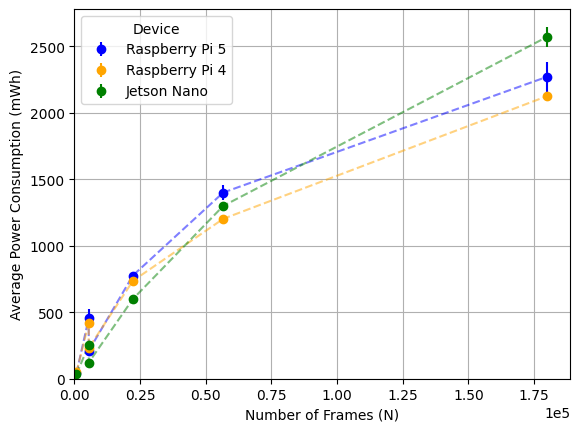

In [19]:
# Plot an errorbar for the Processing Time RPi5 (s) and Processing Time RPi4 (s) columns for each dataset with the standard deviation as the error and Raw Frame Count as the x-axis.
import matplotlib.pyplot as plt
import numpy as np

processing_time_summary_sorted = processing_time_summary.sort_values(by='Raw Video Frame Count', ascending=True)

# Set the seaborn style to vo_8_colorblind
plt.style.use('seaborn-v0_8-colorblind') 

# Set the figure size.
plt.figure(figsize=(10, 6))

# Set the x-axis values
x = processing_time_summary_sorted['Raw Video Frame Count']

# Set the y-axis values.
y_rpi5 = processing_time_summary_sorted['Average_power_mWh_RPi5']
y_rpi4 = processing_time_summary_sorted['Average_power_mWh_RPi4']
y_jn = processing_time_summary_sorted['Average_power_mWh_JN']

# Set the error bar values
error_rpi5 = processing_time_summary_sorted['SD_power_mWh_RPi5']
error_rpi4 = processing_time_summary_sorted['SD_power_mWh_RPi4']
error_jn = processing_time_summary_sorted['SD_power_mWh_JN']

fig, ax = plt.subplots()

# Plot the Values.
ax.errorbar(x, y_rpi5, yerr=error_rpi5, fmt='o', label="RPi5", color='blue')
ax.plot(x, y_rpi5, linestyle='--', alpha=0.5, color='blue')

ax.errorbar(x, y_rpi4, yerr=error_rpi4, fmt='o', label="RPi4", color='orange')
ax.plot(x, y_rpi4, linestyle='--', alpha=0.5, color='orange')

ax.errorbar(x, y_jn, yerr=error_jn, fmt='o', label="JetsonNano", color='green')
ax.plot(x, y_jn, linestyle='--', alpha=0.5, color='green')


# Set the axis labels.
plt.xlabel("Number of Frames (N)")
plt.ylabel("Average Power Consumption (mWh)")

# Set the title of the plot.
# plt.title("Processing Time vs Raw Frame Count")

# Insert Gridlines.
plt.grid()

# Set the legend. and edit labels to Raspberrry Pi 5 and Raspberry Pi 4.
plt.legend(loc="upper left", title="Device")
plt.gca().get_legend().get_texts()[0].set_text('Raspberry Pi 5')
plt.gca().get_legend().get_texts()[1].set_text('Raspberry Pi 4')
plt.gca().get_legend().get_texts()[2].set_text('Jetson Nano')

# Stary the y-axis and x axis from 0.
plt.ylim(0)
plt.xlim(0)

# Chamge the x axis labels to scientific notation.
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.xticks(np.arange(0, max(x)+1, 1000))


# Save the plot as a png file.
plt.savefig("./Experiments/Figures/power_consumption.png", dpi=300, bbox_inches='tight')

# Show the plot.
plt.show()

